1-12. 프로젝트 1 : 손수 설계하는 선형회귀, 당뇨병 수치를 맞춰보자!

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_diabetes
import matplotlib.pyplot as plt
%matplotlib inline 
%config InlineBackend.figure_format = 'retina'
diabetes = load_diabetes()

In [2]:
df_X = diabetes.data
df_y = diabetes.target

In [3]:
print(type(df_X))
print(type(df_y))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [4]:
X_train, X_test, y_train, y_test = train_test_split(df_X, df_y, test_size=0.3, random_state=42)

In [5]:
W = np.random.rand(10)
b = np.random.rand()

In [6]:
def model(X, W, b):
    predictions = 0
    for i in range(10):
        predictions += X[:, i] * W[i]
    predictions += b
    return predictions

In [7]:
def MSE(a, b):
    mse = ((a - b) ** 2).mean()
    return mse

In [8]:
def loss(X, W, b, y):
    predictions = model(X, W, b)
    L = MSE(predictions, y)
    return L

In [9]:
def gradient(X, W, b, y):
    N = len(y)
    
    y_pred = model(X, W, b)
    
    dW = 1/N * 2 * X.T.dot(y_pred - y)
        
    db = 2 * (y_pred - y).mean()
    return dW, db

In [10]:
dW, db = gradient(X_train, W, b, y_train)
print("dW:", dW)
print("db:", db)

dW: [-1.72055178 -0.14110688 -5.42951799 -3.73271138 -1.87130738 -1.50702641
  3.15393743 -3.72426625 -4.50449923 -3.81487755]
db: -307.3247491256239


In [11]:
LEARNING_RATE = 0.4

In [12]:
losses = []

for i in range(1, 1001):
    dW, db = gradient(X_train, W, b, y_train)
    W -= LEARNING_RATE * dW
    b -= LEARNING_RATE * db
    L = loss(X_train, W, b, y_train)
    losses.append(L)
    if i % 10 == 0:
        print('Iteration %d : Loss %0.4f' % (i, L))

Iteration 10 : Loss 5825.7077
Iteration 20 : Loss 5560.5627
Iteration 30 : Loss 5326.4715
Iteration 40 : Loss 5119.4241
Iteration 50 : Loss 4935.9459
Iteration 60 : Loss 4773.0254
Iteration 70 : Loss 4628.0519
Iteration 80 : Loss 4498.7613
Iteration 90 : Loss 4383.1894
Iteration 100 : Loss 4279.6315
Iteration 110 : Loss 4186.6076
Iteration 120 : Loss 4102.8322
Iteration 130 : Loss 4027.1879
Iteration 140 : Loss 3958.7035
Iteration 150 : Loss 3896.5335
Iteration 160 : Loss 3839.9422
Iteration 170 : Loss 3788.2883
Iteration 180 : Loss 3741.0128
Iteration 190 : Loss 3697.6280
Iteration 200 : Loss 3657.7075
Iteration 210 : Loss 3620.8789
Iteration 220 : Loss 3586.8160
Iteration 230 : Loss 3555.2330
Iteration 240 : Loss 3525.8791
Iteration 250 : Loss 3498.5341
Iteration 260 : Loss 3473.0040
Iteration 270 : Loss 3449.1181
Iteration 280 : Loss 3426.7255
Iteration 290 : Loss 3405.6929
Iteration 300 : Loss 3385.9021
Iteration 310 : Loss 3367.2484
Iteration 320 : Loss 3349.6385
Iteration 330 : L

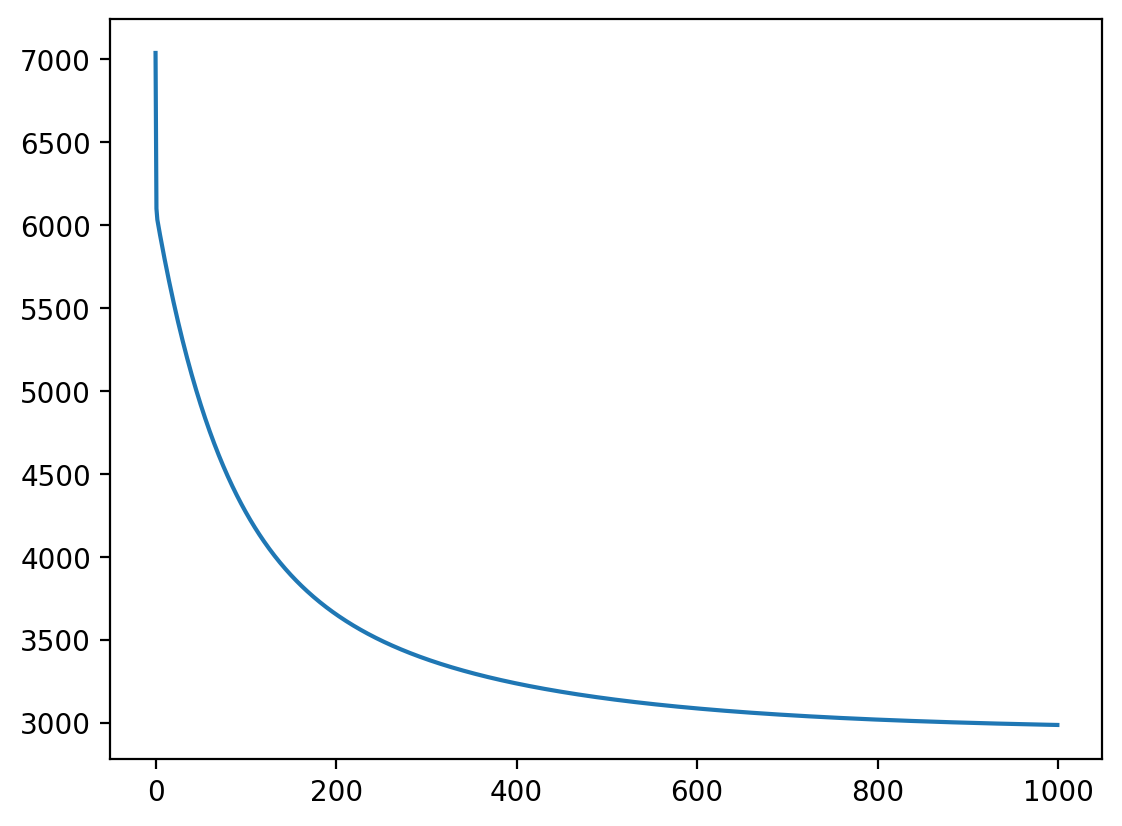

In [13]:
import matplotlib.pyplot as plt
plt.plot(losses)
plt.show()

In [14]:
W, b

(array([  45.68772843, -191.220439  ,  495.81664896,  333.29590861,
         -68.2885538 ,  -94.00135318, -230.48810394,  152.21886388,
         317.46120275,  119.75099174]),
 150.94012478717858)

In [15]:
prediction = model(X_test, W, b)
mse = loss(X_test, W, b, y_test)
mse

2808.0806027247722

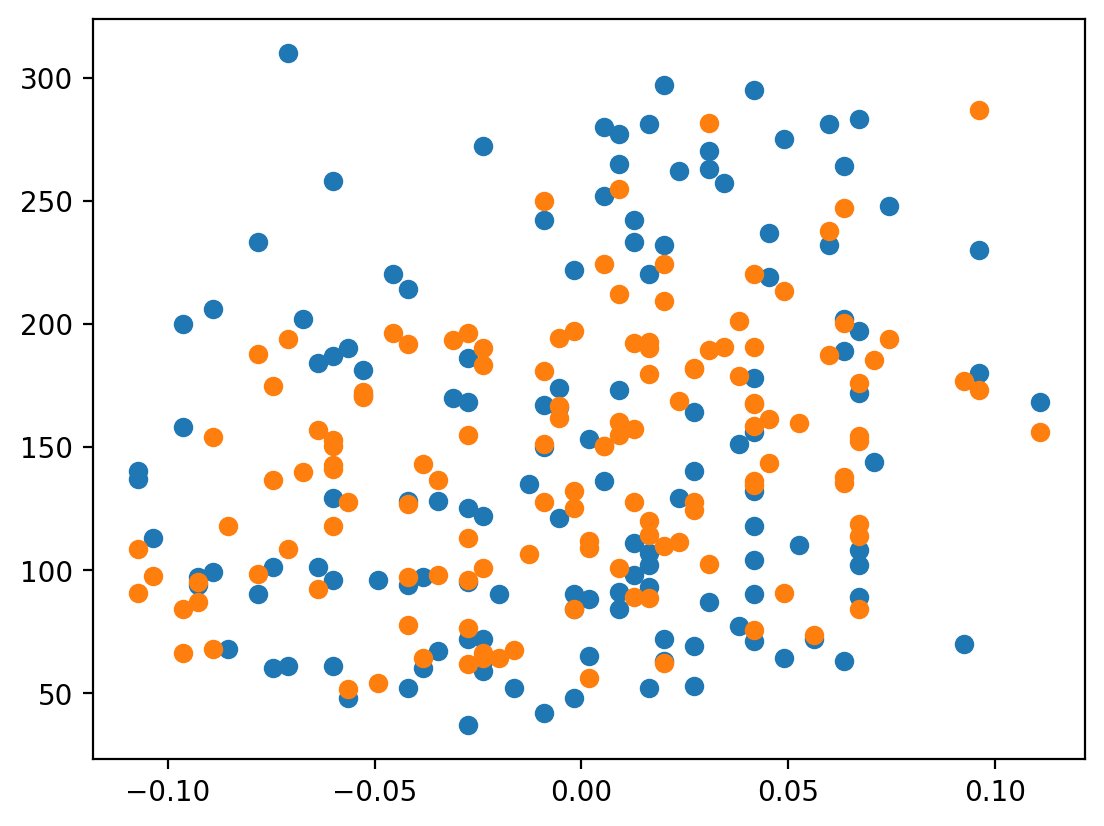

In [16]:
plt.scatter(X_test[:, 0], y_test)
plt.scatter(X_test[:, 0], prediction)
plt.show()

1-13. 프로젝트 2 : 날씨 좋은 월요일 오후 세 시, 자전거 타는 사람은 몇 명?

In [17]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 
%config InlineBackend.figure_format = 'retina'

In [22]:
train = pd.read_csv('C:\\Users\\pjkpc\\Desktop\\파이썬\\20230406\\bike\\train.csv')
test = pd.read_csv('C:\\Users\\pjkpc\\Desktop\\파이썬\\20230406\\bike\\test.csv')

In [23]:
train['datetime']=pd.to_datetime(train['datetime'])

In [24]:
train['year'] = train['datetime'].dt.year
train['month'] = train['datetime'].dt.month
train['day'] = train['datetime'].dt.day
train['hour'] = train['datetime'].dt.hour
train['minute'] = train['datetime'].dt.minute
train['second'] = train['datetime'].dt.second

In [25]:
cols = ['year','month','day','hour','minute','second']

In [26]:
train.isnull().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
year          0
month         0
day           0
hour          0
minute        0
second        0
dtype: int64

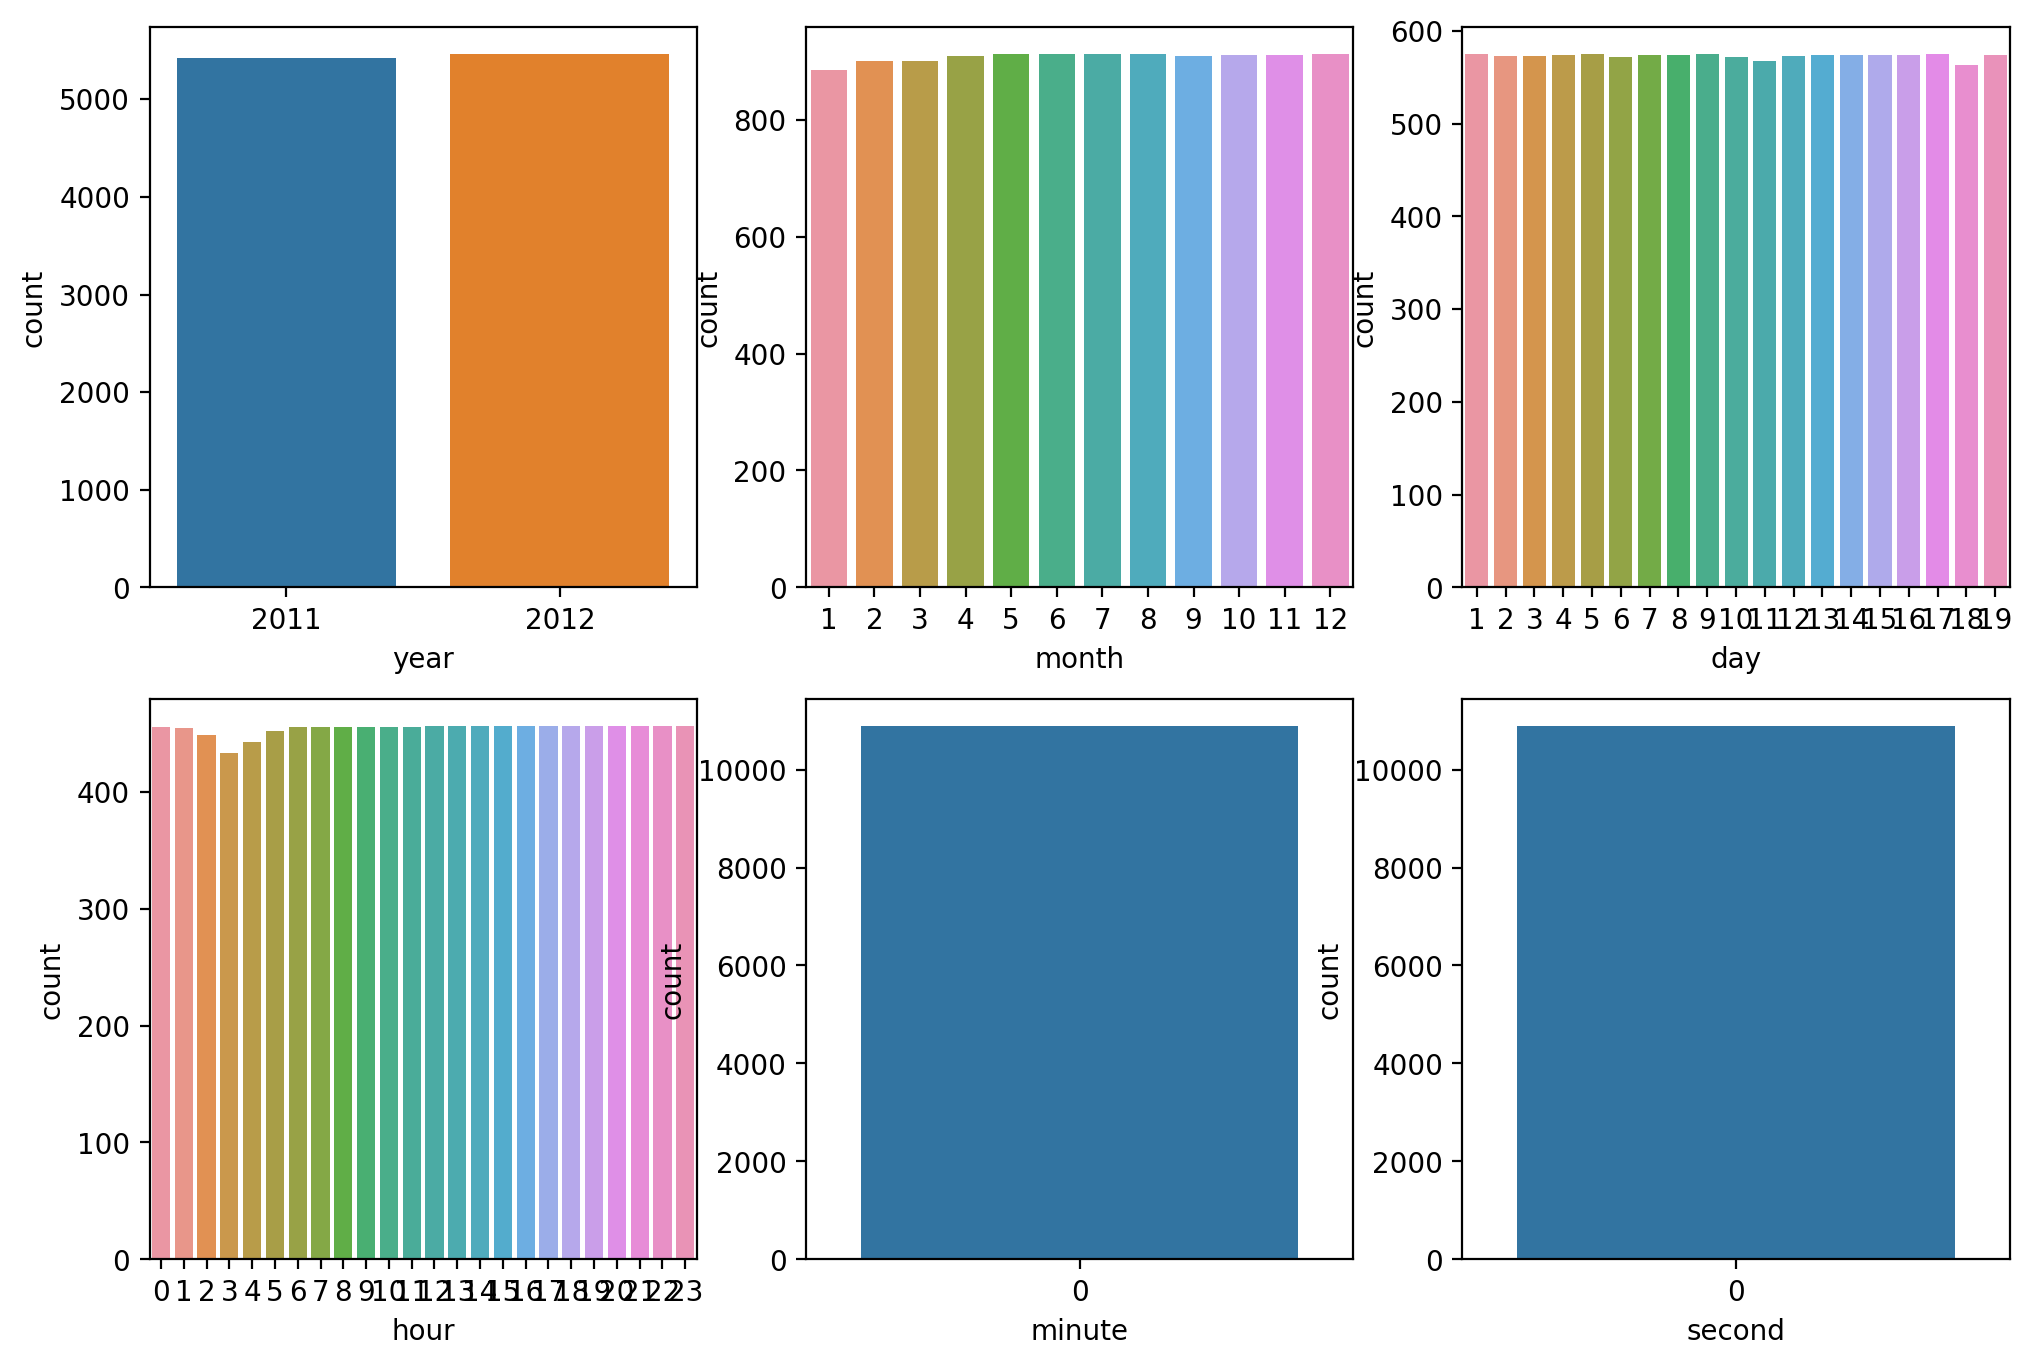

In [27]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(12, 8))
for ax, col in zip(axes.flatten(), cols):
    sns.countplot(x=col, data=train, ax=ax)

In [28]:
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,minute,second
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,0,0,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,1,0,0
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1,2,0,0
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,1,3,0,0
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,1,4,0,0


C:\Users\pjkpc\AppData\Local\Temp\ipykernel_23880\3037508696.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = train.corr()


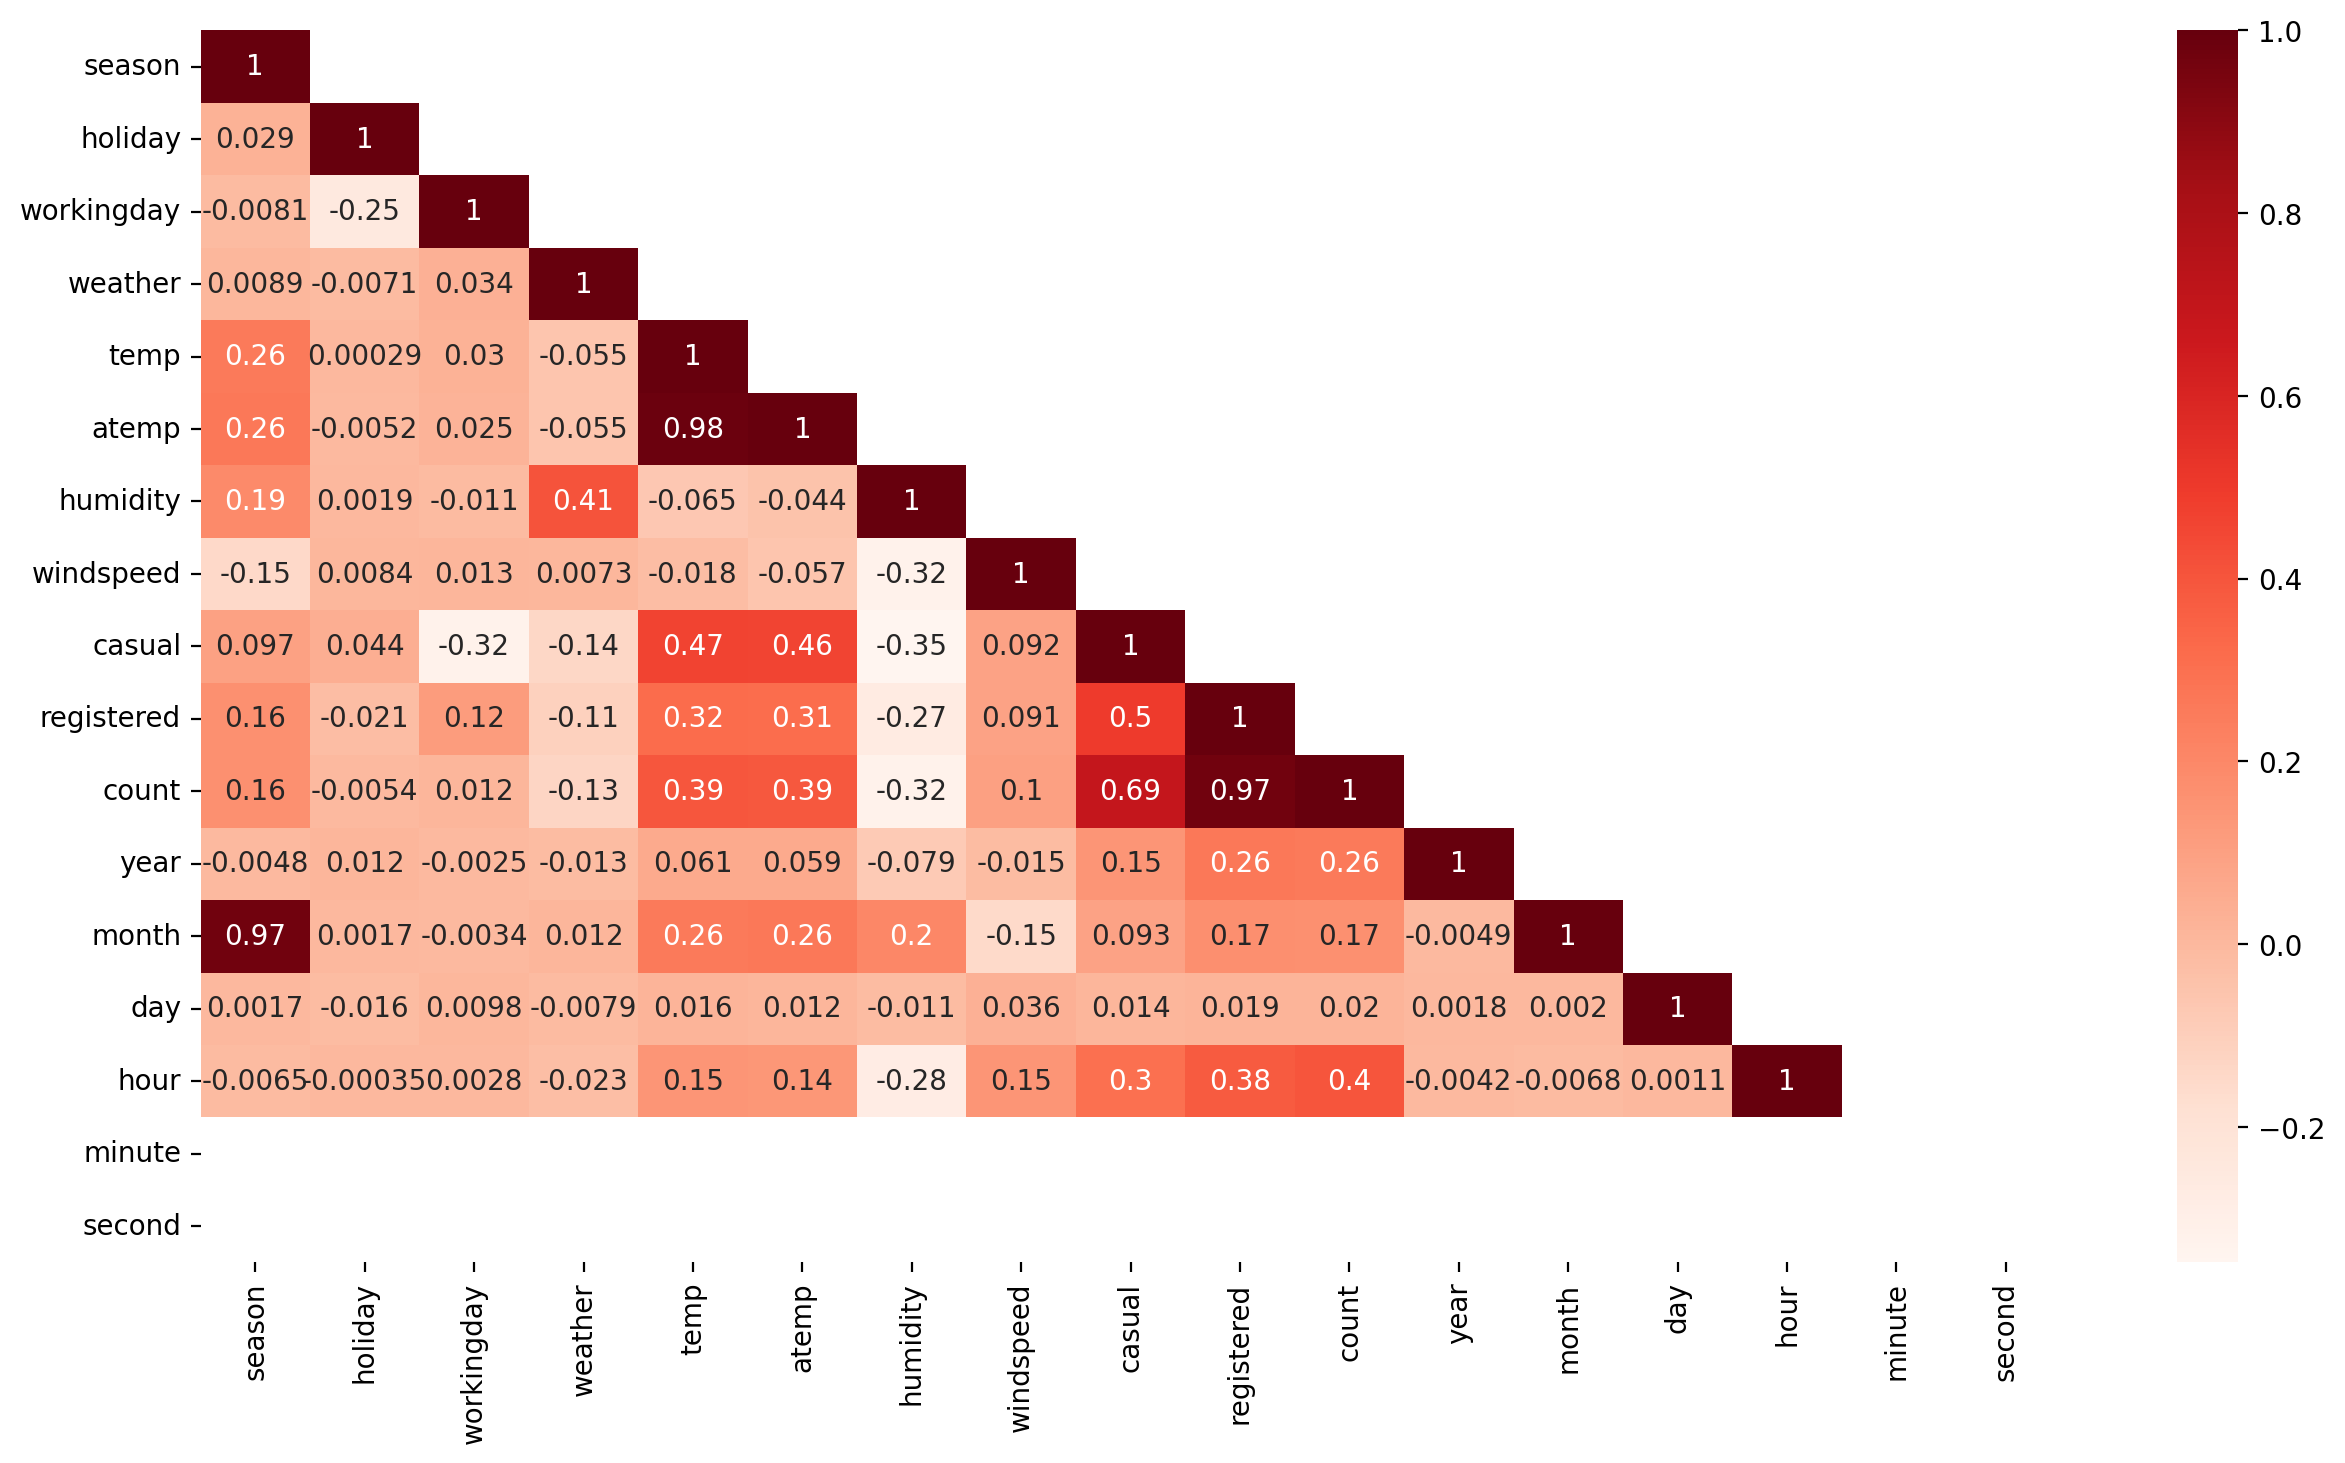

In [29]:
corr_matrix = train.corr()
mask = np.array(corr_matrix)
mask[np.tril_indices_from(mask)] = False
plt.figure(figsize=(15, 8))
sns.heatmap(corr_matrix, mask = mask, annot=True, cmap='Reds')
plt.show()

In [30]:
train.drop(['casual', 'registered'], axis=1, inplace=True)

In [31]:
train.drop('datetime', axis=1, inplace=True)

In [32]:
X=train[['season', 'holiday', 'workingday', 'weather', 'temp', 'atemp', 'humidity', 'windspeed', 'year', 'month', 'day', 'hour', 'minute', 'second']]

In [33]:
y = train.pop('count')

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [35]:

from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [36]:
predictions = lr.predict(X_test)
predictions

array([248.10627003,  48.79765547, 200.90676727, ..., 309.7528022 ,
        38.17030198, 243.62697388])

In [37]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test, predictions)

rmse = mean_squared_error(y_test, predictions, squared=False)
print(mse)
print(rmse)

19945.370053754057
141.22807813517133


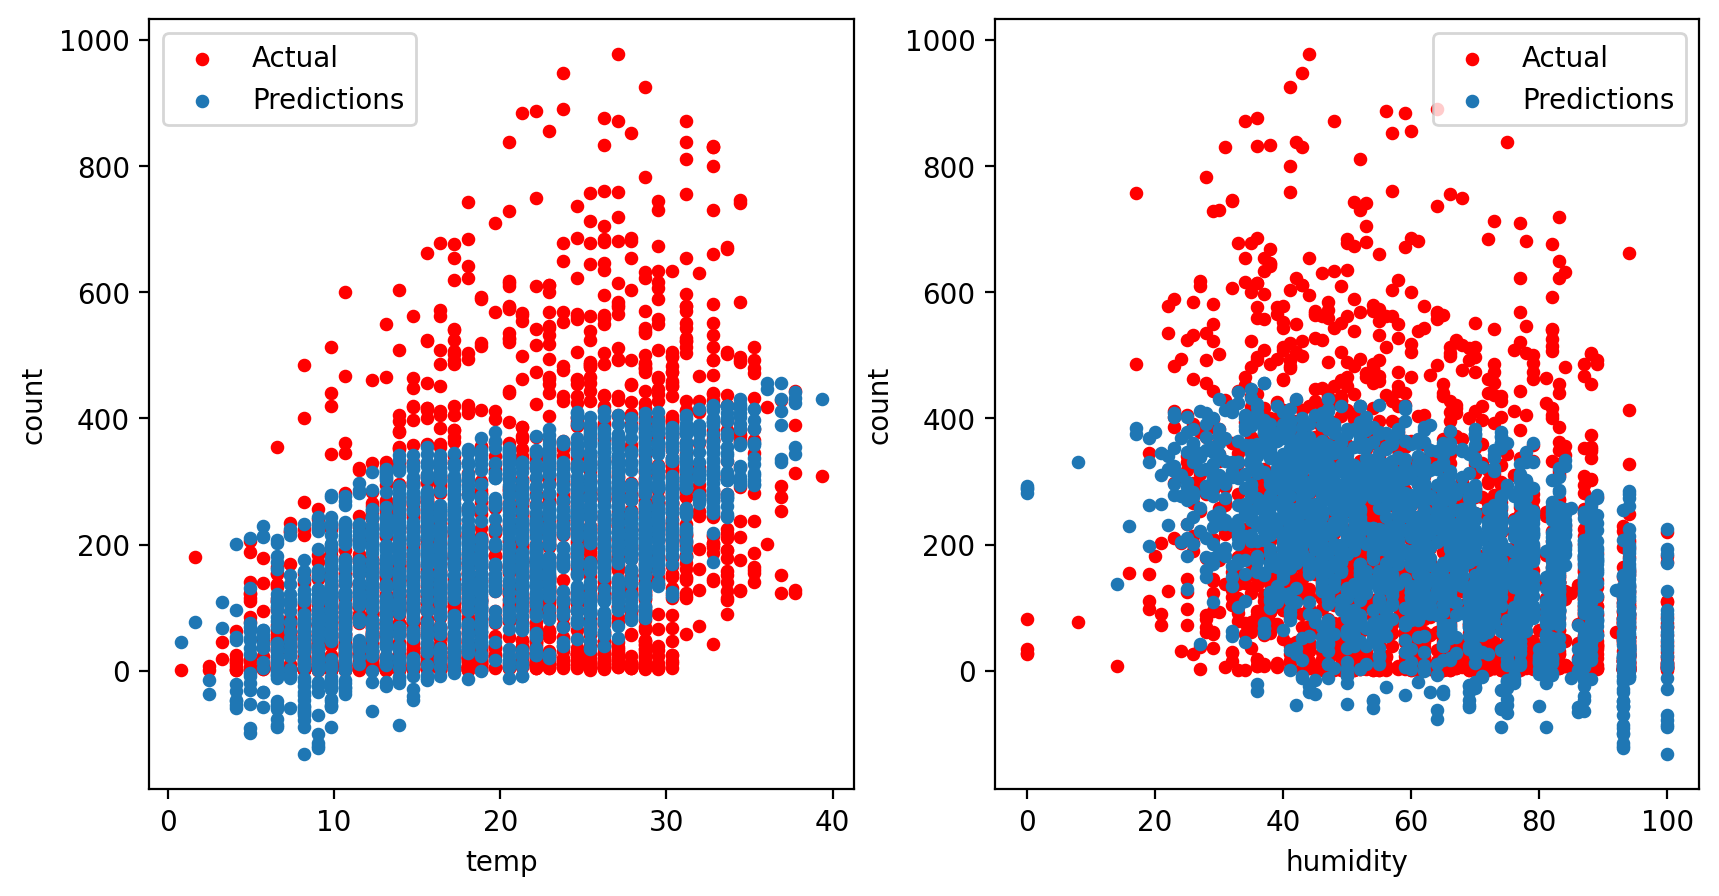

In [38]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

ax1.scatter(X_test['temp'], y_test, color='red', label='Actual', s=15)
ax1.scatter(X_test['temp'], predictions, label='Predictions', s=15)
ax1.set_xlabel('temp')
ax1.set_ylabel('count')
ax1.legend()

ax2.scatter(X_test['humidity'], y_test, color='red', label='Actual', s=15)
ax2.scatter(X_test['humidity'], predictions, label='Predictions', s=15)
ax2.set_xlabel('humidity')
ax2.set_ylabel('count')
ax2.legend()

plt.show()